In [20]:
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage.data import astronaut
import matplotlib.pyplot as plt
from skimage import io

In [56]:
# Simulation d'une carte de salience avec une gaussienne
def make_mask(slic):
    dims = np.shape(slic)
    x, y = np.meshgrid(np.linspace(-1,1,dims[1]), np.linspace(-1,1,dims[0]))
    d = np.sqrt((x/2)*(x/2)+y*y)
    sigma, mu = 5, -2
    g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
    g += np.random.rand(dims[0], dims[1]) * 0.1
    return g

## Segmentation SLIC

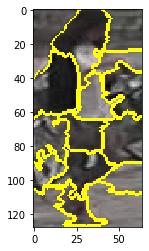

16


In [57]:
img = io.imread("1.jpg")
# low compactness = color more important
# sigma = smoothing
segments_slic = slic(img, n_segments=20, compactness=15, sigma=0.1)
plt.imshow(mark_boundaries(img, segments_slic))
plt.show()
print(len(np.unique(segments_slic)))
mask = make_mask(segments_slic)

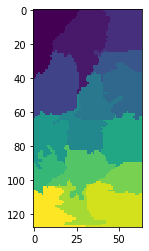

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [58]:
plt.imshow(segments_slic)
plt.show()
print(np.unique(segments_slic))

## Utilisation de la salience pour sélectionner les segments

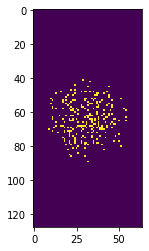

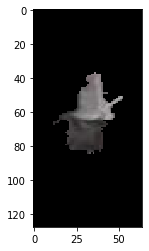

In [114]:
threshold_mask = mask > 0.99
plt.imshow(threshold_mask*255)
plt.show()
utile = []
for i in np.unique(segments_slic):
    cur_seg = segments_slic == i
    tot = np.sum(cur_seg * threshold_mask)
    if tot > 40:
        utile.append(i)
 
m = np.zeros_like(segments_slic, dtype=bool)
for v in utile:
    m += segments_slic == v

plt.imshow(img * m[...,None])
plt.show()